$$J(u) = - \frac{1}{2}x(2)+\int_{0}^{2}(x^2(t)-u^2(t))dt \to min$$
$$\dot x = u, \quad x(0)= 0, \quad \| u(t)\| \leq 1$$

### Функция Понтрягина
$$H(\psi, x, u, t) = \psi u - x^2 + u^2$$
$$H_u = \psi + 2u$$
$$H_x = - 2x$$
$$\phi_x = -\frac{1}{2}$$

### Сопряженнаяя система
$$\dot \psi = -H_x = 2x, \quad \psi(2) = - \psi_x(2) = \frac{1}{2}$$

### Начальное приближение управления
$$u^0 (t) = 0, \quad t \in T$$
Для него находим фазовую и сопряженную траектории:
$$\dot x^0 = 0, \quad x^0(0) = 0;$$
$$\dot \psi^0 = 2x^0, \quad \psi^0(2) = \frac{1}{2}.$$
Отсюда 
$$x^0(t) = 0, \psi^0 (t) = \frac{1}{2}$$

### Формирование нового управления
$$\overline{u^0} = \arg \max_{v \in U} H^0_u v=(\psi^0+2u^0)v = \arg \max_{v \in U} \frac{v}{2} = 1$$

### Проверка принципа максимума
$$\delta (u^0) = \int_T H^0_u(\overline{u^0} - u^0)dt =$$
$$\int_T \frac{1}{2}(1 - 0)dt > 0$$
Отсюда следует управление не оптимально.

Строим новое управление
$$u_\alpha^0 = u^0+\alpha (\overline{u^0} - u^0), \quad \alpha \in [0, 1] $$
$$u_\alpha^0 = 0 + \alpha (1-0) =\alpha, \quad \alpha \in [0, 1] $$

$$J(\alpha)= - \frac{1}{2}x_\alpha(2)+\int_{0}^{2}(x_\alpha^2-\alpha^2)dt \to min$$
$$\dot x_\alpha = \alpha, \quad x(0)= 0$$

### Решение
$$x_\alpha = \alpha t$$
$$J(\alpha) = - \alpha + \int_0^2(\alpha^2 t^2 - \alpha^2)dt =  - \alpha + \alpha^2[( \frac{t^3}{3} - t)|^{2}_{t=0}]=\alpha^2 \frac{2}{3}- \alpha$$
$$\alpha^2 \frac{2}{3}- \alpha \to \min_{\alpha \in [0, 1]}$$

Функция выпуклая, ее производная равна $\frac{4}{3}\alpha -1$

Решение:
$$\alpha = \frac{3}{4}$$

Отсюда новое управление:
$$u^1 = u_\alpha^0 = \frac{3}{4}$$

# Численный метод

In [1]:
using LaTeXStrings
using Plots

In [301]:
t = 0:0.01:2

function dxdt(uk)
    delta_t = t[2]-t[1]
    n = length(uk)
    x = zeros(n)
    x[1] = 0
    for i = 2:n
        x[i] = x[i-1] + uk[i]*delta_t
    end
    return x
end

function dpsidt(xk)
    delta_t = t[2]-t[1]
    n = length(xk)
    psi = zeros(n)
    psi[end] = 1/2
    for i = n:-1:2
        psi[i-1] =  psi[i] - 2*xk[i]*delta_t
    end
    return psi
end

function Hu(psik, uk)
    return psik + 2*uk
end

function argmax_v(Hk)
    n = length(Hk)
    v_var = -1:0.01:1
    arg = Hk * transpose(v_var)
    v = zeros(n)
    for i=1:n
        _, ind = findmax(arg[i, :])
        v[i] = v_var[ind]
    end
    return v
end

function delta_test(Hk, vk, uk)
    n = length(t)
    delta_t = t[2]-t[1]
    rez = 0
    for i=1:n
        rez += Hk[i]*(vk[i]-uk[i])*delta_t
    end
    return delta_t == 0
end

function new_u(vk, uk, a0=0, a1=1)
    delta_t = t[2]-t[1]
    da = (a1-a0)/10
    a = a0:da:a1
    n = length(t)
    m = length(a)
    uk_a = ones(m)*transpose(uk) + a*transpose(vk-uk)
    J = zeros(m)
    for i = 1:m
        u_ai = uk_a[i, :]
        x_ai = dxdt(u_ai)
        J[i] = -0.5 * x_ai[end]
        for k = 1:n-1
            J[i] += (x_ai[k]^2 - u_ai[k]^2)*delta_t
        end
    end
    
    J_min, ind = findmin(J)
    return uk + a[ind]*(vk-uk), J_min 
end

new_u (generic function with 3 methods)

In [308]:
m = 10
n = length(t)
U = zeros(m, n)
X = zeros(m, n)
u0 = zeros(n)
U[1, :] = u0
J = zeros(m-1)
for i in 1:m-1
    u0 = U[i, :]
    x0 = dxdt(u0)
    X[i,:] = x0
    psi0 = dpsidt(x0)
    H0 = Hu(psi0, u0)
    v0 = argmax_v(H0)
    if ~delta_test(H0, v0, u0)
        u1, J[i] = new_u(v0, u0)
        u0 = u1
        U[i+1,:] = u0
    end
end


[ Info: Saved animation to /home/daniil/program/julia/anim_u.gif


Plots.AnimatedGif("/home/daniil/program/julia/anim_u.gif")
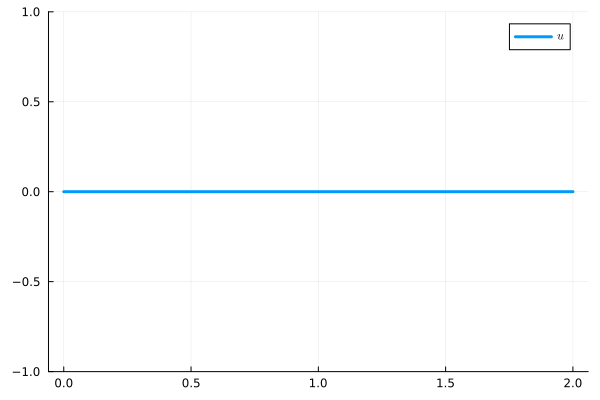

In [304]:
anim = @animate for i ∈ 1:m
    plot(t, [U[i, :]], label=L"u",ylims=(-1,1),lw=3)
end
gif(anim, "anim_u.gif", fps = 5)

[ Info: Saved animation to /home/daniil/program/julia/anim_x.gif


Plots.AnimatedGif("/home/daniil/program/julia/anim_x.gif")
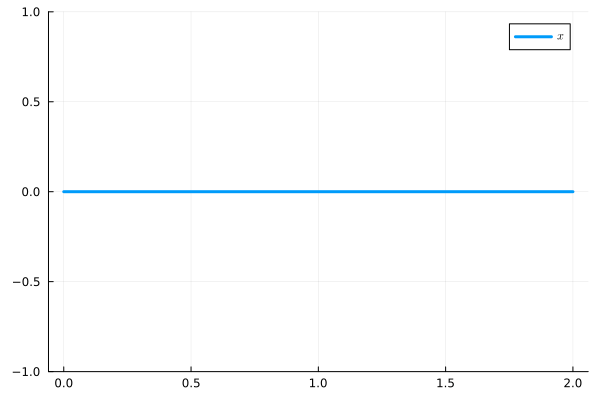

In [306]:
anim = @animate for i ∈ 1:m
    plot(t, [X[i, :]], label=L"x",ylims=(-1,1),lw=3)
end
gif(anim, "anim_x.gif", fps = 5)

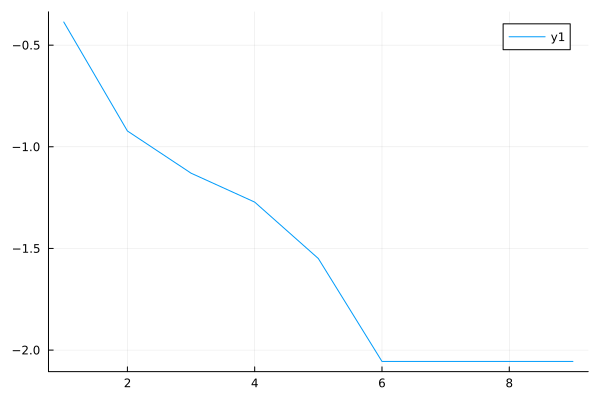

In [307]:
plot(J)